In [ ]:
!pip install transformers

     |████████████████████████████████| 2.6 MB 6.8 MB/s 
     |████████████████████████████████| 3.3 MB 50.6 MB/s 
     |████████████████████████████████| 636 kB 55.0 MB/s 
     |████████████████████████████████| 895 kB 27.0 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

df = pd.read_excel('/content/prev_ds.xlsx')
df

,Phrase,Sentiment
0,The only fisherman in the world is a fisherman...,2
1,"Hi, I'm Carolyn Hoeschele of Purdue University...",2
2,Hope Santa will be kind to you and give you to...,1
3,This is sally smith with rose industries. I am...,2
4,Happy Christmas How it was Click the text belo...,1
...,...,...
730,We need prople like you in our socity to make ...,5
731,The only fisherman in the world is a fisherman...,2
732,We present a generalization of the Cauchy/Lore...,7
733,Have some talent? join us to use it,4


In [ ]:
import numpy as np

seq_len = 512
num_samples = len(df)

Xids = np.zeros((num_samples, seq_len))
Xmask = np.zeros((num_samples, seq_len))

Xids.shape

(735, 512)

In [ ]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

for i, phrase in enumerate(df['Phrase']):
    tokens = tokenizer.encode_plus(phrase, max_length=seq_len, truncation=True, padding='max_length', add_special_tokens=True, return_tensors='tf')
    Xids[i, :] = tokens['input_ids']
    Xmask[i, :] = tokens['attention_mask']

In [ ]:
Xids

array([[ 101., 1996., 2069., ...,    0.,    0.,    0.],
       [ 101., 7632., 1010., ...,    0.,    0.,    0.],
       [ 101., 3246., 4203., ...,    0.,    0.,    0.],
       ...,
       [ 101., 2057., 2556., ...,    0.,    0.,    0.],
       [ 101., 2031., 2070., ...,    0.,    0.,    0.],
       [ 101., 1045., 2342., ...,    0.,    0.,    0.]])

In [ ]:
Xmask

array([[1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.]])

In [ ]:
arr = df['Sentiment'].values
arr = arr - 1
arr
# df['Sentiment'].unique()

array([1, 1, 0, 1, 0, 3, 3, 4, 5, 0, 1, 6, 5, 1, 1, 1, 6, 6, 0, 5, 6, 6,
       2, 1, 0, 5, 1, 3, 2, 6, 0, 3, 1, 1, 6, 0, 6, 1, 5, 3, 5, 0, 4, 0,
       0, 6, 6, 3, 0, 5, 6, 3, 5, 6, 2, 3, 3, 2, 0, 6, 5, 0, 0, 3, 6, 3,
       4, 2, 6, 2, 5, 4, 2, 0, 4, 4, 2, 0, 6, 3, 2, 6, 1, 1, 4, 6, 2, 5,
       3, 4, 0, 5, 0, 0, 5, 4, 3, 1, 2, 0, 4, 5, 2, 1, 6, 2, 2, 1, 5, 6,
       4, 3, 3, 1, 0, 1, 3, 4, 6, 5, 1, 1, 1, 6, 3, 4, 0, 6, 0, 5, 5, 0,
       1, 4, 0, 2, 5, 3, 4, 3, 5, 4, 3, 6, 4, 6, 3, 5, 6, 1, 5, 3, 0, 3,
       0, 5, 3, 3, 3, 4, 2, 6, 2, 5, 1, 6, 5, 6, 3, 0, 4, 3, 6, 4, 1, 6,
       6, 4, 3, 0, 0, 2, 1, 2, 3, 6, 5, 2, 3, 3, 4, 0, 5, 5, 6, 3, 4, 4,
       5, 3, 6, 4, 3, 6, 1, 1, 3, 1, 6, 0, 4, 3, 2, 6, 1, 0, 0, 3, 1, 3,
       6, 0, 1, 3, 5, 5, 4, 5, 1, 6, 0, 3, 5, 5, 6, 5, 6, 5, 2, 3, 2, 0,
       0, 3, 1, 0, 0, 3, 5, 0, 6, 5, 2, 2, 0, 5, 4, 4, 6, 0, 5, 0, 0, 3,
       2, 6, 4, 2, 6, 1, 5, 6, 1, 6, 4, 3, 1, 1, 4, 3, 2, 5, 4, 3, 6, 5,
       0, 1, 0, 1, 1, 0, 6, 4, 4, 0, 2, 6, 4, 4, 2,

In [ ]:
labels = np.zeros((num_samples, arr.max()+1))
labels.shape

(735, 7)

In [ ]:
labels[np.arange(num_samples), arr] = 1
labels

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

## Input Pipeline

In [ ]:
import tensorflow as tf

dataset = tf.data.Dataset.from_tensor_slices((Xids, Xmask, labels))

dataset.take(1)

<TakeDataset shapes: ((512,), (512,), (7,)), types: (tf.float64, tf.float64, tf.float64)>

In [ ]:
def map_func(input_ids, masks, labels):
    # we convert our three-item tuple into a two-item tuple where the input item is a dictionary
    return {'input_ids': input_ids, 'attention_mask': masks}, labels

# then we use the dataset map method to apply this transformation
dataset = dataset.map(map_func)

dataset.take(1)

<TakeDataset shapes: ({input_ids: (512,), attention_mask: (512,)}, (7,)), types: ({input_ids: tf.float64, attention_mask: tf.float64}, tf.float64)>

In [ ]:
batch_size = 32

dataset = dataset.shuffle(10000).batch(batch_size, drop_remainder=True)

dataset.take(1)

<TakeDataset shapes: ({input_ids: (32, 512), attention_mask: (32, 512)}, (32, 7)), types: ({input_ids: tf.float64, attention_mask: tf.float64}, tf.float64)>

In [ ]:
split = 0.7

# we need to calculate how many batches must be taken to create 80% training set
size = int((Xids.shape[0] / batch_size) * split)

size

16

In [ ]:
train_ds = dataset.take(size)
val_ds = dataset.skip(0)

# free up memory
del dataset

# Build and train

In [ ]:

from transformers import TFAutoModel

bert = TFAutoModel.from_pretrained('bert-base-uncased')

# we can view the model using the summary method
bert.summary()

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Model: "tf_bert_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bert (TFBertMainLayer)       multiple                  109482240 
Total params: 109,482,240
Trainable params: 109,482,240
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import tensorflow as tf

# two input layers, we ensure layer name variables match to dictionary keys in TF dataset
input_ids = tf.keras.layers.Input(shape=(512,), name='input_ids', dtype='int32')
mask = tf.keras.layers.Input(shape=(512,), name='attention_mask', dtype='int32')

# we access the transformer model within our bert object using the bert attribute (eg bert.bert instead of bert)
embeddings = bert.bert(input_ids, attention_mask=mask)[1]  # access final activations (alread max-pooled) [1]
# convert bert embeddings into 5 output classes
x = tf.keras.layers.Dense(1024, activation='relu')(embeddings)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dense(32, activation='relu')(x)

x = tf.keras.layers.Dropout(0.3)(x)
y = tf.keras.layers.Dense(7, activation='softmax', name='outputs')(x)

Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.


In [ ]:
# initialize model
model = tf.keras.Model(inputs=[input_ids, mask], outputs=y)

# (optional) freeze bert layer
model.layers[2].trainable = False

# print out model summary
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_ids (InputLayer)          [(None, 512)]        0                                            
__________________________________________________________________________________________________
attention_mask (InputLayer)     [(None, 512)]        0                                            
__________________________________________________________________________________________________
bert (TFBertMainLayer)          TFBaseModelOutputWit 109482240   input_ids[0][0]                  
                                                                 attention_mask[0][0]             
__________________________________________________________________________________________________
dense (Dense)                   (None, 1024)         787456      bert[0][1]                   

In [ ]:
# save_callback = tf.keras.callbacks.ModelCheckpoint(
#     '/content/drive/MyDrive/bst_wt.hdf5',
#     monitor='val_accuracy',
#     mode='max',
#     save_best_only=True
# )

In [ ]:
# model.load_weights('/content/drive/MyDrive/best_model')

In [ ]:
optimizer = tf.keras.optimizers.Adam(lr=1e-5)
loss = tf.keras.losses.CategoricalCrossentropy()
acc = tf.keras.metrics.CategoricalAccuracy('accuracy')

model.compile(optimizer=optimizer, loss=loss, metrics=[acc])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20,
    # callbacks=[save_callback]
)

Epoch 1/20
16/16 [==============================] - 61s 4s/step - loss: 1.9763 - accuracy: 0.1348 - val_loss: 1.9542 - val_accuracy: 0.0966
Epoch 2/20
16/16 [==============================] - 54s 4s/step - loss: 1.9496 - accuracy: 0.1504 - val_loss: 1.9448 - val_accuracy: 0.1506
Epoch 3/20
16/16 [==============================] - 54s 4s/step - loss: 1.9403 - accuracy: 0.1543 - val_loss: 1.9390 - val_accuracy: 0.1605
Epoch 4/20
16/16 [==============================] - 56s 4s/step - loss: 1.9313 - accuracy: 0.1875 - val_loss: 1.9311 - val_accuracy: 0.2031
Epoch 5/20
16/16 [==============================] - 55s 4s/step - loss: 1.9331 - accuracy: 0.1758 - val_loss: 1.9279 - val_accuracy: 0.1989
Epoch 6/20
16/16 [==============================] - 55s 4s/step - loss: 1.9305 - accuracy: 0.1699 - val_loss: 1.9238 - val_accuracy: 0.2102
Epoch 7/20
16/16 [==============================] - 66s 4s/step - loss: 1.9309 - accuracy: 0.1777 - val_loss: 1.9222 - val_accuracy: 0.2528
Epoch 8/20
16/16 [==

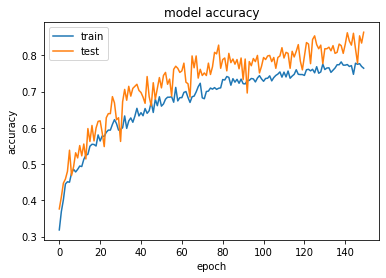

In [ ]:
import matplotlib.pyplot as plt


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

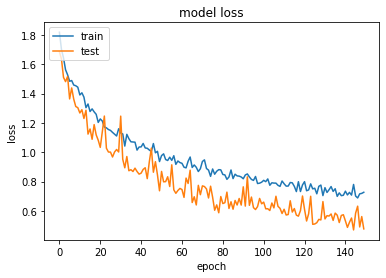

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/best_model')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: /content/drive/MyDrive/best_model/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/best_model/assets


# Load and Predict

In [ ]:
import tensorflow as tf

model = tf.keras.models.load_model('/content/drive/MyDrive/best_model')

# view model architecture to confirm we have save and loaded correctly
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_ids (InputLayer)          [(None, 512)]        0                                            
__________________________________________________________________________________________________
attention_mask (InputLayer)     [(None, 512)]        0                                            
__________________________________________________________________________________________________
bert (Custom>TFBertMainLayer)   {'pooler_output': (N 109482240   input_ids[0][0]                  
                                                                 attention_mask[0][0]             
__________________________________________________________________________________________________
dense (Dense)                   (None, 1024)         787456      bert[0][1]                   

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
# predicted = model.predict(df['Tweet'])

In [ ]:
an = np.array([np.argmax(i) for i in predicted])
an
# arr

array([4, 1, 0, 0, 0, 4, 0, 5, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 6,
       0, 6, 0, 0, 1, 0, 1, 0, 0, 1, 2, 6, 0, 1, 0, 0, 0, 0, 0, 0, 1, 6,
       0, 5, 0, 0, 4, 6, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 4, 0, 4, 3, 0, 3, 0, 0, 0, 0, 0, 4, 4, 1, 1, 0, 4, 0, 0, 1,
       0, 0, 6, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 4, 0, 1, 0, 0, 4, 0, 0,
       1, 4, 0, 0, 0, 1, 0, 5, 1, 1, 1, 0, 0, 0, 2, 1, 1, 2, 5, 2, 0, 0,
       4, 0, 6, 0, 0, 0, 0, 4, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 4, 0, 2, 0, 0, 0, 0, 2, 4, 4, 2, 1, 1, 0, 0, 0, 0, 4,
       0, 0, 0, 0, 0, 0, 1, 4, 0, 4, 1, 0, 0, 2, 1, 0])

In [ ]:
score = model.evaluate(val_ds) 

print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

6/6 [==============================] - 16s 2s/step - loss: 0.7113 - accuracy: 0.8333
Test loss: 0.7113425135612488
Test accuracy: 0.8333333134651184


In [ ]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

def prep_data(text):
    tokens = tokenizer.encode_plus(text, max_length=512,
                                   truncation=True, padding='max_length',
                                   add_special_tokens=True, return_token_type_ids=False,
                                   return_tensors='tf')
    # tokenizer returns int32 tensors, we need to return float64, so we use tf.cast
    return {'input_ids': tf.cast(tokens['input_ids'], tf.float64),
            'attention_mask': tf.cast(tokens['attention_mask'], tf.float64)}

In [ ]:
an = []

for i, row in df.iterrows():
    # get token tensors
    tokens = prep_data(row['Phrase'])
    # get probabilities
    probs = model.predict(tokens)
    # find argmax for winning class
    pred = np.argmax(probs)
    # add to dataframe
    an.append(pred)

# df.head()

In [ ]:
an = np.array(an)
an

array([4, 1, 0, ..., 0, 1, 0])

In [ ]:
print(classification_report(arr, an))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       834
           1       0.88      0.93      0.91       277
           2       0.92      0.96      0.94       132
           3       0.94      0.92      0.93       244
           4       0.87      0.86      0.87       392
           5       0.97      0.84      0.90       183
           6       0.96      0.84      0.89       317

    accuracy                           0.91      2379
   macro avg       0.92      0.90      0.91      2379
weighted avg       0.92      0.91      0.91      2379



In [ ]:
conf = confusion_matrix(arr, an)

In [ ]:
conf

array([[810,  14,   2,   1,   3,   0,   4],
       [ 14, 258,   1,   2,   1,   1,   0],
       [  3,   0, 127,   1,   0,   0,   1],
       [  9,   2,   0, 224,   6,   2,   1],
       [ 32,  10,   2,   5, 338,   1,   4],
       [ 11,   6,   5,   1,   5, 153,   2],
       [  7,   3,   1,   4,  36,   0, 266]])

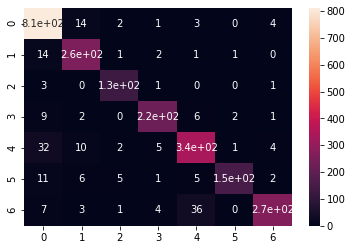

In [ ]:
import seaborn as sns
sns.heatmap(conf, annot=True)

In [ ]:
 from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, arr, an, cv=5, scoring='f1_macro')
scores

In [ ]:
stmt = input()
probs = model.predict(prep_data(stmt))[0]

probs

@TheRafaMafia Hey there! You can view the video here:  https://t.co/f2K2rqGf79 where you are briefly featured at 1:02. Enjoy!


array([0.92497486, 0.01838735, 0.01129976, 0.00166099, 0.02466378,
       0.00705248, 0.0119608 ], dtype=float32)

In [ ]:
import numpy as np

np.argmax(probs)

0

In [ ]:
import pandas as pd

# so we can see full phrase
pd.set_option('display.max_colwidth', None)

df = pd.read_csv('test.tsv', sep='\t')
df.head()

In [ ]:
df = df.drop_duplicates(subset=['SentenceId'], keep='first')
df.head()

In [ ]:
df['Sentiment'] = None

for i, row in df.iterrows():
    # get token tensors
    tokens = prep_data(row['Phrase'])
    # get probabilities
    probs = model.predict(tokens)
    # find argmax for winning class
    pred = np.argmax(probs)
    # add to dataframe
    df.at[i, 'Sentiment'] = pred

df.head()

In [ ]:
df.tail()